In [15]:
import os
import pandas as pd
from yaml import safe_load

# Dossier contenant les runs MLflow (expérience 0)
mlruns_path = "mlruns/0"

# Liste pour stocker les données combinées
combined_data = []

# Parcours des sous-dossiers de runs
for run_id in os.listdir(mlruns_path):
    run_dir = os.path.join(mlruns_path, run_id)
    if not os.path.isdir(run_dir):
        continue

    # Dictionnaire pour stocker les données de ce run
    run_data = {"run_id": run_id}

    # Récupération des params
    params_path = os.path.join(run_dir, "params")
    if os.path.exists(params_path):
        for param_file in os.listdir(params_path):
            with open(os.path.join(params_path, param_file), "r") as f:
                value = f.read().strip()
                run_data[param_file] = value  # clé = nom du paramètre

    # Récupération des metrics (dernière valeur de chaque métrique)
    metrics_path = os.path.join(run_dir, "metrics")
    if os.path.exists(metrics_path):
        for metric_file in os.listdir(metrics_path):
            with open(os.path.join(metrics_path, metric_file), "r") as f:
                lines = [line.strip() for line in f if line.strip()]
                if lines:
                    # Format: step timestamp value (on prend la dernière ligne)
                    last_value = float(lines[-1].split(" ")[1])
                    run_data[metric_file] = last_value  # clé = nom de la métrique

    combined_data.append(run_data)

# Création du DataFrame combiné
combined_df = pd.DataFrame(combined_data)


combined_df

,run_id,beta,unlearn,seed,unlearn_lr,class_to_replace,quantile,num_indexes_to_replace,dataset,unlearn_epochs,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val
0,909d408261314a2c9f9f086efe8e6245,0.9,SalGrad,1,0.0001,-1,0.4,22500,cifar10,10,...,0.860844,0.983644,0.894267,67.50,6.323600,98.364444,25.78,0.907956,99.604444,93.66
1,473d1656a06b464eb5de555e89ef5933,0.9,VarGrad,2,0.0001,-1,0.5,2250,cifar10,8,...,0.626222,0.887556,0.796000,72.95,2.337533,88.755556,10.70,0.814667,93.143860,87.48
2,54079394c2104665bf75b5cf44d26876,0.9,VarGrad,3,0.0001,-1,0.5,22500,cifar10,2,...,0.906933,0.944756,0.836311,64.43,9.909436,94.475556,23.78,0.823200,94.795556,89.32
3,9df5752f8ef24017be88fd249cec3b2b,0.9,ProbGrad,1,0.0001,-1,0.5,22500,cifar10,7,...,0.671022,0.047422,0.617733,7.29,7.275307,4.742222,-59.82,0.629600,9.248889,6.76
4,1d385aae891e41598f174f35fe785f26,0.9,VarGrad,1,0.0001,-1,0.5,2250,cifar10,9,...,0.613333,0.890667,0.824444,75.30,2.337050,89.066666,10.56,0.844444,95.242105,88.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,f6dea025cd3e4e79ab55993402bb303b,0.9,VarGrad,3,0.0001,-1,0.5,22500,cifar10,1,...,0.960444,0.984889,0.882622,65.90,10.805149,98.488889,27.69,0.899778,98.542222,93.44
2040,941e79e8939445ae83ffb053b9524397,0.9,VarGrad,3,0.0001,0,0.5,3500,cifar10,10,...,0.393714,0.252000,0.506857,71.68,2.058225,25.200000,7.12,0.494286,91.995181,83.68
2041,f179019376034c748b14e4f56d68644c,0.9,SalGrad,3,0.0001,-1,0.3,3500,cifar10,4,...,0.416857,0.330286,0.446286,72.97,1.093419,33.028571,9.80,0.436857,94.515663,85.84
2042,28001d5da9734d12b53e0869eb657be5,0.9,VarGrad,2,0.0001,-1,0.3,22500,cifar10,9,...,0.830222,0.925778,0.850711,64.61,3.994161,92.577778,24.82,0.846489,98.755556,91.84


In [16]:
os.listdir(mlruns_path)

['909d408261314a2c9f9f086efe8e6245',
 '473d1656a06b464eb5de555e89ef5933',
 '54079394c2104665bf75b5cf44d26876',
 '9df5752f8ef24017be88fd249cec3b2b',
 '1d385aae891e41598f174f35fe785f26',
 'd52636aaf5b74857a4b7bd572ceb4c3d',
 '6905f32a8f6144df938ff667d2313638',
 'e88534c455464382b519dc9ab2c99bd1',
 '508caa83ecb64614889bd9a3e7e81da3',
 '31c604e203ec4577997ed1379dd3a1eb',
 'ca49e523854844a4822fab49eac0bd87',
 '5b78614a2bd44b809d350f7349028b41',
 '1e414e20391145019f436434925517e4',
 '9fd754894c974c26a79fb3d987563f4d',
 '02aed862a6964602af1bf7ea8780335b',
 'cffbcfdad8d34c6789e7bed77e9adbaa',
 '20c16cc8d93c403aa36c6e5e446fb7ed',
 '2aca113386e140608b53a286b5d93464',
 '374cda273a1b413fb16e52e80a61fdbe',
 'b1b3edb68f294ddcaabbcac805f4d674',
 '5ae15139f96d41188ac51ce082c6e495',
 '3e099cfa11d645f08edaf49d57cfd5c0',
 '440f3d88ac0948309b0eb424fb268d44',
 'b9b420c72bcd4c898fd917d68a9cad19',
 '9599ab08a59f4b948c40f1630db3e71a',
 '30b2d1216df0471e86260e059d74e50a',
 'f6d81706d0544c9abd5cab8c829d90d4',
 

In [17]:
combined_df

,run_id,beta,unlearn,seed,unlearn_lr,class_to_replace,quantile,num_indexes_to_replace,dataset,unlearn_epochs,...,MIA_prob,MIA_correctness,MIA_m_entropy,Fid,RTE,forget,relativeUA,MIA_entropy,retain,val
0,909d408261314a2c9f9f086efe8e6245,0.9,SalGrad,1,0.0001,-1,0.4,22500,cifar10,10,...,0.860844,0.983644,0.894267,67.50,6.323600,98.364444,25.78,0.907956,99.604444,93.66
1,473d1656a06b464eb5de555e89ef5933,0.9,VarGrad,2,0.0001,-1,0.5,2250,cifar10,8,...,0.626222,0.887556,0.796000,72.95,2.337533,88.755556,10.70,0.814667,93.143860,87.48
2,54079394c2104665bf75b5cf44d26876,0.9,VarGrad,3,0.0001,-1,0.5,22500,cifar10,2,...,0.906933,0.944756,0.836311,64.43,9.909436,94.475556,23.78,0.823200,94.795556,89.32
3,9df5752f8ef24017be88fd249cec3b2b,0.9,ProbGrad,1,0.0001,-1,0.5,22500,cifar10,7,...,0.671022,0.047422,0.617733,7.29,7.275307,4.742222,-59.82,0.629600,9.248889,6.76
4,1d385aae891e41598f174f35fe785f26,0.9,VarGrad,1,0.0001,-1,0.5,2250,cifar10,9,...,0.613333,0.890667,0.824444,75.30,2.337050,89.066666,10.56,0.844444,95.242105,88.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,f6dea025cd3e4e79ab55993402bb303b,0.9,VarGrad,3,0.0001,-1,0.5,22500,cifar10,1,...,0.960444,0.984889,0.882622,65.90,10.805149,98.488889,27.69,0.899778,98.542222,93.44
2040,941e79e8939445ae83ffb053b9524397,0.9,VarGrad,3,0.0001,0,0.5,3500,cifar10,10,...,0.393714,0.252000,0.506857,71.68,2.058225,25.200000,7.12,0.494286,91.995181,83.68
2041,f179019376034c748b14e4f56d68644c,0.9,SalGrad,3,0.0001,-1,0.3,3500,cifar10,4,...,0.416857,0.330286,0.446286,72.97,1.093419,33.028571,9.80,0.436857,94.515663,85.84
2042,28001d5da9734d12b53e0869eb657be5,0.9,VarGrad,2,0.0001,-1,0.3,22500,cifar10,9,...,0.830222,0.925778,0.850711,64.61,3.994161,92.577778,24.82,0.846489,98.755556,91.84


394


/var/folders/17/d5wm_d6x5zv68h4w18r3246h4xmqkj/T/ipykernel_21064/2474175281.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(methods))


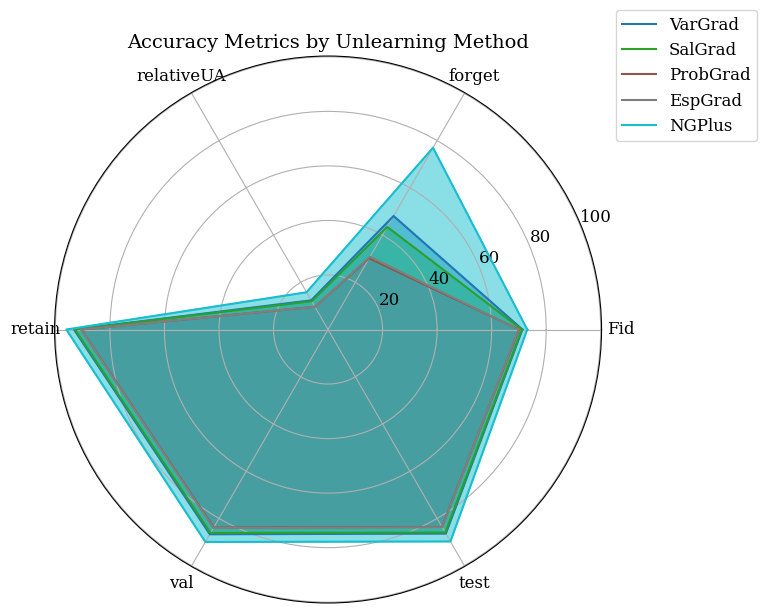

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = combined_df.copy()
df = df[(df["num_indexes_to_replace"] == "1900") & (df["unlearn"] != "FocalGrad")]
# df['relativeUA'] = 100 - df['relativeUA'].astype(float)
print(len(df))

# --- Étape 1 : sélectionner les colonnes d'accuracy ---
accuracy_cols = ['Fid','forget',
       'relativeUA', 'retain', 'val', 'test']
methods = df["unlearn"].unique()
methods = ["VarGrad", "SalGrad", "ProbGrad", "EspGrad", "NGPlus"]

# --- Étape 2 : calcul des moyennes par méthode ---
method_means = df.groupby("unlearn")[accuracy_cols].mean()

# --- Étape 3 : construction du radar plot ---
# Préparation des angles
labels = accuracy_cols
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # boucle fermée

# Style
plt.figure(figsize=(8, 8))
plt.subplot(111, polar=True)

# Couleurs pour les différentes méthodes
colors = plt.cm.get_cmap("tab10", len(methods))

# Tracer chaque méthode
for idx, method in enumerate(methods):
    try:
        values = method_means.loc[method].tolist()
        values += values[:1]  # boucle fermée
        plt.plot(angles, values, label=method, color=colors(idx))
        plt.fill(angles, values, alpha=0.5, color=colors(idx))
    except KeyError:
        print(f"Warning: Method '{method}' not found in the DataFrame.")

# Labels axes
plt.xticks(angles[:-1], labels)
plt.title("Accuracy Metrics by Unlearning Method", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


In [19]:
df.columns

Index(['run_id', 'beta', 'unlearn', 'seed', 'unlearn_lr', 'class_to_replace',
       'quantile', 'num_indexes_to_replace', 'dataset', 'unlearn_epochs',
       'arch', 'model', 'save_dir', 'MIA_confidence', 'test', 'MIA_prob',
       'MIA_correctness', 'MIA_m_entropy', 'Fid', 'RTE', 'forget',
       'relativeUA', 'MIA_entropy', 'retain', 'val'],
      dtype='object')

Loaded vmask from ./results/cifar10/vmask/vmask_0_0.pt with shape torch.Size([64, 3, 3, 3])
Loaded vmask from ./results/cifar10/vmask/vmask_1_0.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_2_0.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_3_0.pt with shape torch.Size([64, 64, 3, 3])
Loaded vmask from ./results/cifar10/vmask/vmask_4_0.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_0_1.pt with shape torch.Size([64, 3, 3, 3])
Loaded vmask from ./results/cifar10/vmask/vmask_1_1.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_2_1.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_3_1.pt with shape torch.Size([64, 64, 3, 3])
Loaded vmask from ./results/cifar10/vmask/vmask_4_1.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_0_2.pt with shape torch.Size([64, 3, 3, 3])
Loaded vmask from ./results/cifar10/vmas

/var/folders/17/d5wm_d6x5zv68h4w18r3246h4xmqkj/T/ipykernel_21064/2755108587.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vmask = torch.load(vmask_path)


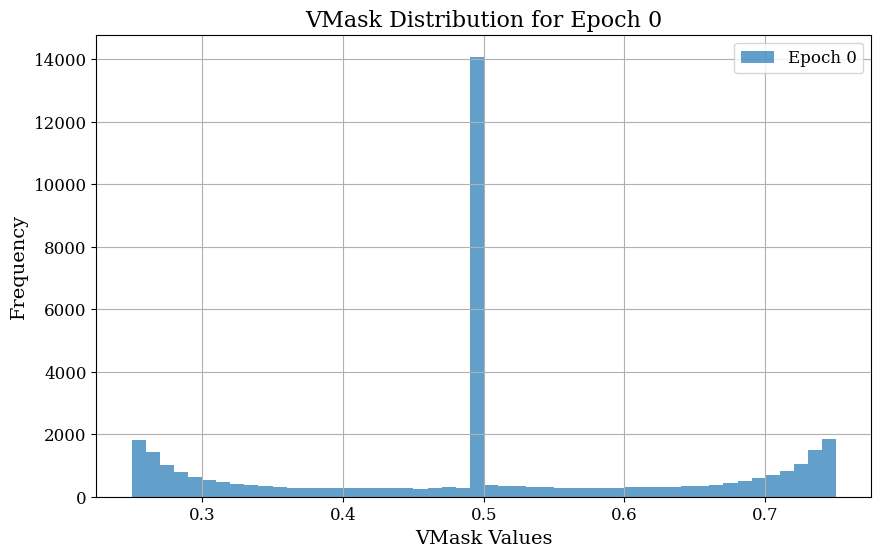

Epoch 1: VMask distribution - Mean: 0.49263089895248413, Std: 0.15036144852638245


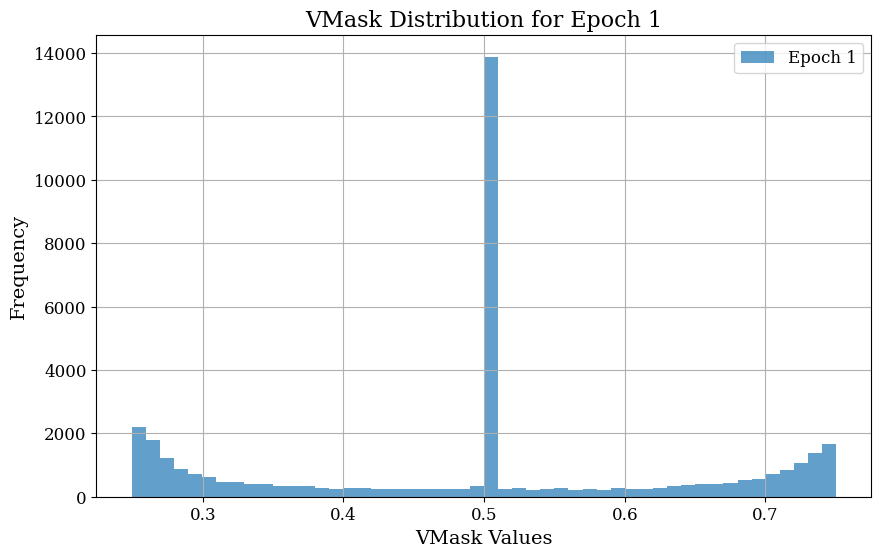

Epoch 2: VMask distribution - Mean: 0.49842777848243713, Std: 0.15476678311824799


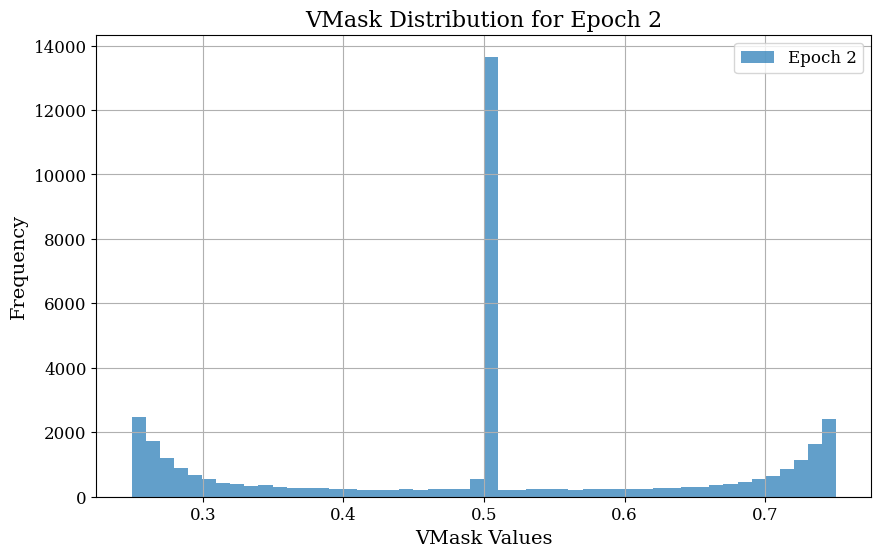

Epoch 3: VMask distribution - Mean: 0.4950687289237976, Std: 0.1488354504108429


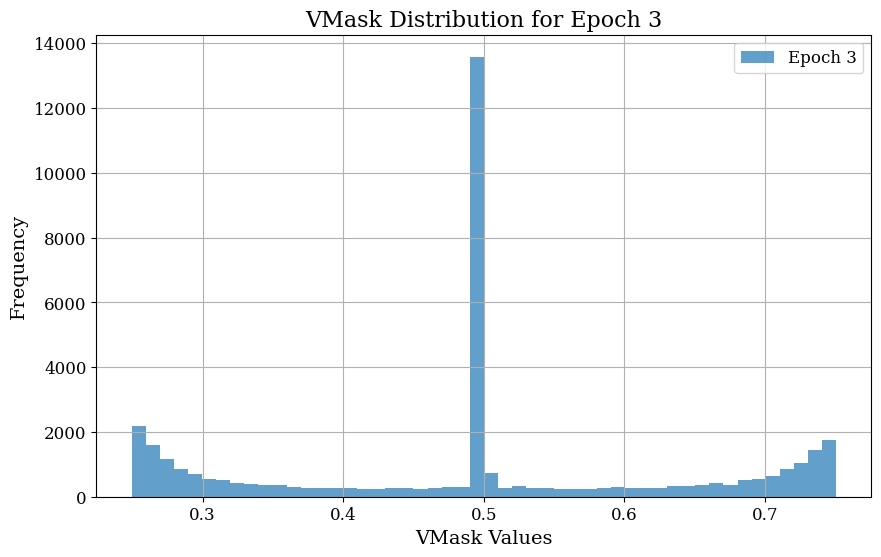

Epoch 4: VMask distribution - Mean: 0.4969460368156433, Std: 0.14433297514915466


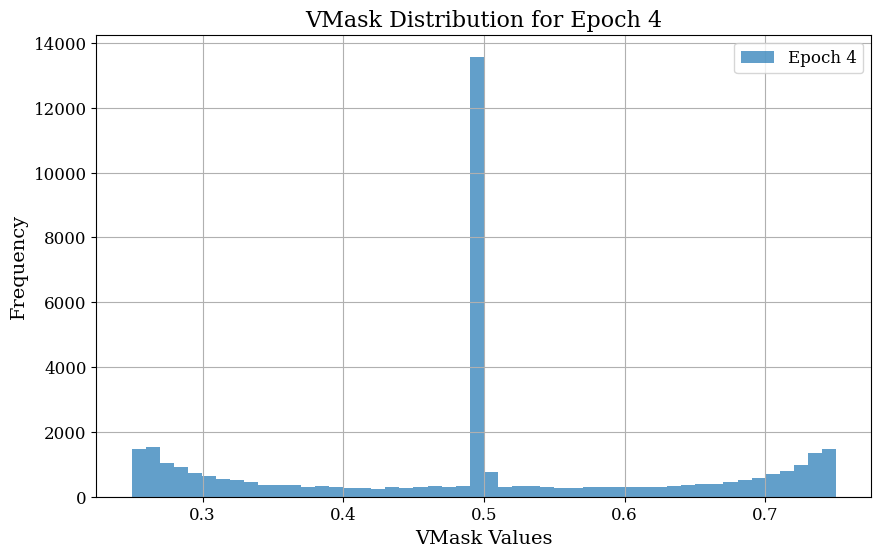

In [20]:
# Check in ./results/cifar10/vmask/ the values of the cdf
# Load torch .pt tensors
import torch
import os
import matplotlib.pyplot as plt

VMask = {}
for epoch in range(5):
    VMask[epoch] = {}

    for idx in range(5):
        vmask_path = f"./results/cifar10/vmask/vmask_{idx}_{epoch}.pt"
        if os.path.exists(vmask_path):
            vmask = torch.load(vmask_path)
            print(f"Loaded vmask from {vmask_path} with shape {vmask.shape}")
            VMask[epoch][idx] = vmask

# For each epoch, print the distribution of the vmask combining all layers
for epoch, masks in VMask.items():
    all_masks = torch.cat([mask.flatten() for mask in masks.values()])
    print(f"Epoch {epoch}: VMask distribution - Mean: {all_masks.mean().item()}, Std: {all_masks.std().item()}")
    plt.figure(figsize=(10, 6))
    plt.hist(all_masks.cpu().numpy(), bins=50, alpha=0.7, label=f'Epoch {epoch}')
    plt.title(f'VMask Distribution for Epoch {epoch}')
    plt.xlabel('VMask Values')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

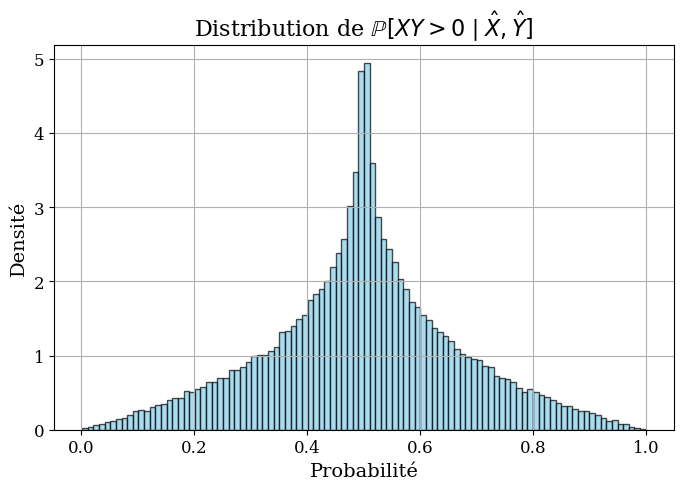

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres
n_samples = 100000
sigma_X = 1.0
sigma_Y = 1.0
sigma_N = 1.
sigma_M = 1.

# Étape 1 : générer X, Y et les bruits
X = 0.1
Y = -0.1
N = np.random.normal(0, sigma_N, n_samples)
M = np.random.normal(0, sigma_M, n_samples)

# Étape 2 : obtenir les observations bruitées
hat_X = X + N
hat_Y = Y + M

# Étape 3 : calculer phi_hat_X, phi_hat_Y
# On normalise par l'écart-type de X (ou hat_X selon le sens de phi_Z)
phi_hat_X = norm.cdf(hat_X / sigma_N)
phi_hat_Y = norm.cdf(hat_Y / sigma_M)

# Étape 4 : calculer la proba conditionnelle
P = phi_hat_X * phi_hat_Y + (1 - phi_hat_X) * (1 - phi_hat_Y)

# Affichage de la distribution de P
plt.figure(figsize=(8, 5))
plt.hist(P, bins=100, density=True, alpha=0.7, color='skyblue', edgecolor='k')
plt.title(r'Distribution de $\mathbb{P}[XY > 0 \mid \hat{X}, \hat{Y}]$')
plt.xlabel('Probabilité')
plt.ylabel('Densité')
plt.grid(True)
plt.show()


/var/folders/17/d5wm_d6x5zv68h4w18r3246h4xmqkj/T/ipykernel_21064/3586491614.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vmask = torch.load(vmask_path)


Loaded vmask from ./results/cifar10/vmask/vmask_0_0.pt with shape torch.Size([64, 3, 3, 3])
Loaded vmask from ./results/cifar10/vmask/vmask_1_0.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_2_0.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_3_0.pt with shape torch.Size([64, 64, 3, 3])
Loaded vmask from ./results/cifar10/vmask/vmask_4_0.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_0_1.pt with shape torch.Size([64, 3, 3, 3])
Loaded vmask from ./results/cifar10/vmask/vmask_1_1.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_2_1.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_3_1.pt with shape torch.Size([64, 64, 3, 3])
Loaded vmask from ./results/cifar10/vmask/vmask_4_1.pt with shape torch.Size([64])
Loaded vmask from ./results/cifar10/vmask/vmask_0_2.pt with shape torch.Size([64, 3, 3, 3])
Loaded vmask from ./results/cifar10/vmas

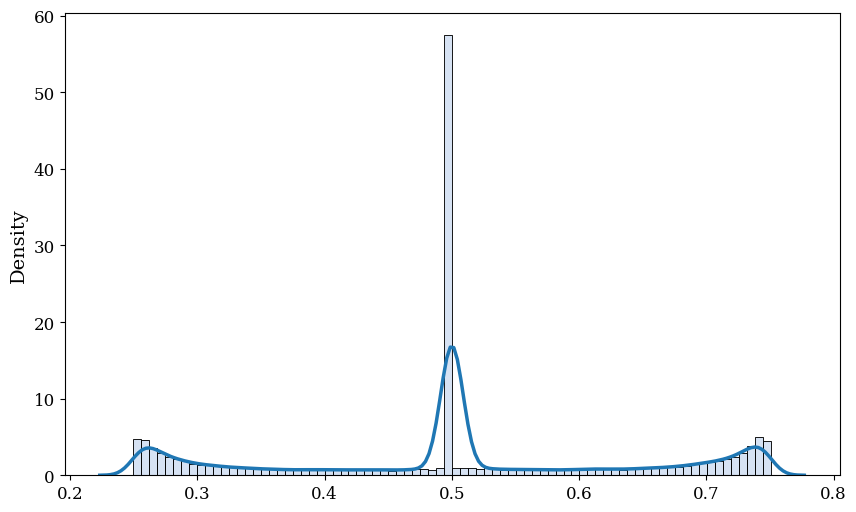

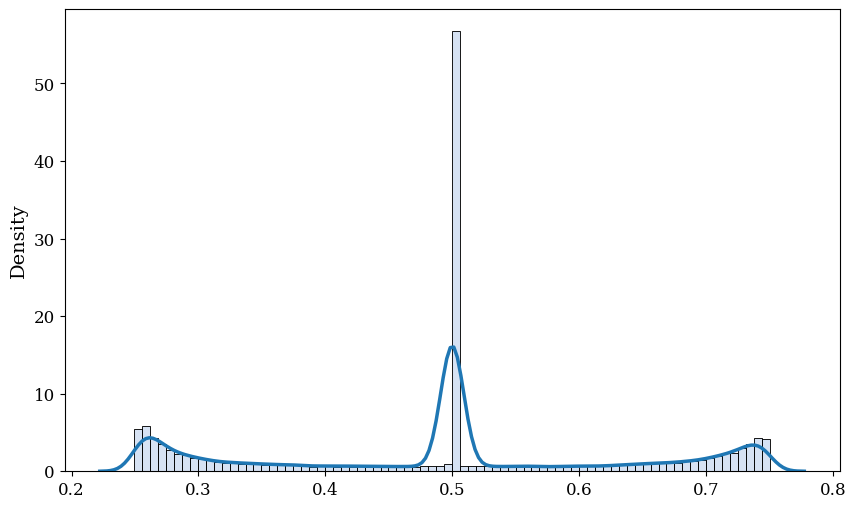

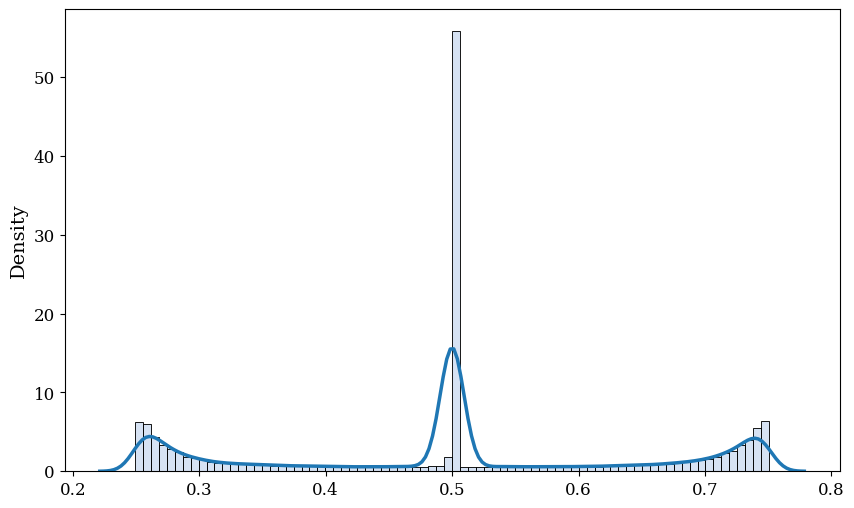

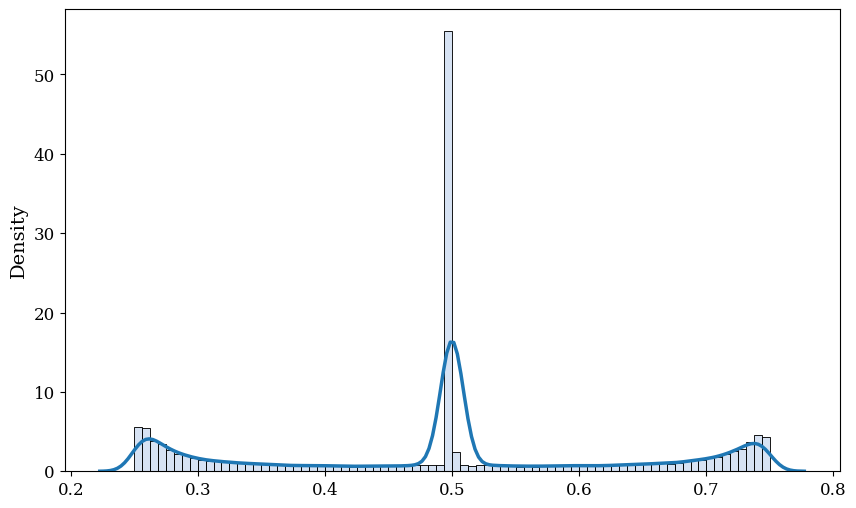

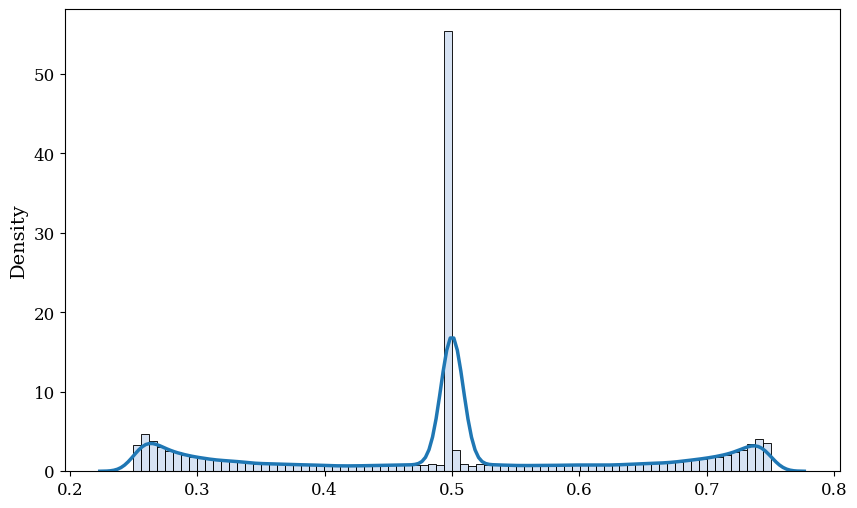

In [22]:
import torch
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Configuration matplotlib pour rendu publication
mpl.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,  # Peut être mis à True si tu compiles en LaTeX
})

# Couleurs sobres pour publication
main_color = "#1f77b4"       # bleu scientifique
hist_color = "#aec7e8"        # bleu clair

# Chargement des tensors VMask
VMask = {}
for epoch in range(5):
    VMask[epoch] = {}
    for idx in range(5):
        vmask_path = f"./results/cifar10/vmask/vmask_{idx}_{epoch}.pt"
        if os.path.exists(vmask_path):
            vmask = torch.load(vmask_path)
            print(f"Loaded vmask from {vmask_path} with shape {vmask.shape}")
            VMask[epoch][idx] = vmask

# Affichage de la distribution avec histogramme + KDE
for epoch, masks in VMask.items():
    all_masks = torch.cat([mask.flatten() for mask in masks.values()])
    values = all_masks.cpu().numpy()
    mean_val = values.mean()
    std_val = values.std()
    count = len(values)

    print(f"Epoch {epoch}: Mean={mean_val:.4f}, Std={std_val:.4f}, Count={count}")

    plt.figure(figsize=(10, 6))

    # Histogramme
    sns.histplot(
        values,
        bins=80,
        stat="density",
        color=hist_color,
        edgecolor="black",
        alpha=0.5,
        label="Histogram"
    )

    # KDE
    sns.kdeplot(
        values,
        color=main_color,
        linewidth=2.5,
        bw_adjust=0.5,
        label="Density (KDE)"
    )
    if epoch > 5 :
        # Titres et légendes
        plt.title("Distribution of the Probability", pad=10)
        plt.suptitle(f"Mean = {mean_val:.4f} | Std = {std_val:.4f} | N = {count}", fontsize=10, y=0.95, color='gray')

        plt.xlabel("Values of $\mathbb{P}[XY > 0| \hat X,\hat Y]$")
        plt.ylabel("Density")
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.legend()
        plt.tight_layout()
        plt.show()
